# CSCI-UA 0473 - Introduction to Machine Learning
## Monday, March 25, 2019

In this part of the HW you need to implement NMF of the 20newsgroups dataset.

You can use TFIDF as a feature extractor for you examples. Make is as simple as possible from the feature extraction perspective (simple extraction is already done for you here).

You can get 10 points max for this task. Your notebook should be *fully* reproducible to get full points.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

## 1. Data (0 points)

In [3]:
newsgroups_train = datasets.fetch_20newsgroups(subset='train', 
                                               categories=['comp.sys.mac.hardware', 'rec.motorcycles', 'sci.med', 'soc.religion.christian'])

In [4]:
tfidf_vectorizer = TfidfVectorizer(min_df=30, stop_words='english')
X = tfidf_vectorizer.fit_transform(newsgroups_train.data)
y = newsgroups_train.target

## 2. NMF - Nonnegative Matrix Factorization (5 points)

In [43]:
# <TODO> import proper class
from sklearn.decomposition import NMF

In [44]:
# <TODO> uncomment below. choose q that minimizes reconstruction error below (try a few values. no need to search exhaustively)
q = 10

In [45]:
# <TODO> uncomment below. initialize NMF model
nmf = NMF(n_components=q)

In [46]:
# <TODO> uncomment below. train NMF model and retrieve the low-dimension projection of X.
Z = nmf.fit_transform(X)

In [47]:
# <TODO> uncomment below. retrieve reconstruction error
error = nmf.reconstruction_err_

In [48]:
print ("Reconstruction error : {:.4f}".format(error))

Reconstruction error : 45.4413


(q, reconstruction error)=
(2, 47.0572)
(5, 46.2338)
(10, 45.4413)

In [49]:
print ('Original Shape: ', X.shape)
print ('Reduced Shape: ', Z.shape)

Original Shape:  (2369, 1529)
Reduced Shape:  (2369, 10)


## 3. Visualizing the reduced data points (2 points)

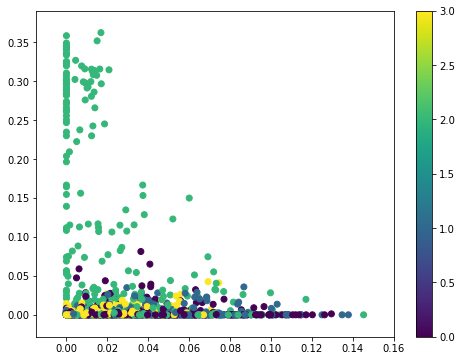

In [50]:
plt.figure(figsize=(8, 6))
plt.scatter(Z[:, 0], Z[:, 1], c = y)
plt.colorbar()

## 4. Analysis (3 points)

In [51]:
# <TODO> uncomment below. Retrieve W
W = nmf.components_

In [52]:
W.shape

(10, 1529)

In [53]:
invocab = dict([(vv,kk) for kk, vv in tfidf_vectorizer.vocabulary_.items()])

for i in range(q):
    insens_idx = np.argsort(W[i])

    print ('TOPIC ' + str(i))
    print (' '.join([invocab[w_ix] for w_ix in insens_idx[-10:]]) + '\n')

TOPIC 0
cwru lines subject organization state posting host nntp university edu

TOPIC 1
n3jxp cadre dsl shameful edu cs gordon banks geb pitt

TOPIC 2
church christian hell believe faith christ bible christians jesus god

TOPIC 3
video problem card monitor quadra scsi se drive apple mac

TOPIC 4
reaction foods berkeley steve dyer superstition chinese sensitivity food msg

TOPIC 5
intelligence aisun3 programs athens mcovingt covington michael uga georgia ai

TOPIC 6
host nntp posting hp ed writes article east sun com

TOPIC 7
org ac riding dog ride dod uk bnr ca bike

TOPIC 8
medical patients science doctor like know disease people time don

TOPIC 9
lady 1983 corn bike com zx chris nj nec behanna

